<span style="font-size:3em;font-weight:500">Стабилизация перевёрнутого маятника с неподвижной осью подвеса</span>

<span style="font-size:2em;font-weight:500">Расчётно-графическая работа для лабораторного практикума. Задания. Часть 1. Линейные и нелинейные стратегии управления</span>

**Автор: В. А. Костин**  

**2025 год**
$\newcommand{\ctg}{\mathop{\mathrm{ctg}}\nolimits}$
$\newcommand{\tg}{\mathop{\mathrm{tg}}\nolimits}$
$\newcommand{\arctg}{\mathop{\mathrm{arctg}}\nolimits}$
$\newcommand{\degree}{^{\circ}}$
$\renewcommand{\Re}{\mathop{\mathrm{Re}}\nolimits}$
$\newcommand{\D}{\mathrm{d}}$

# Задание 1. Инициализация параметров маятника

*Запишите в соответствующие переменные номер группы, фамилию, имя и отчество выполняющего работу.* *После этого запустите на выполнение изменённую ячейку и три следующие ячейки с кодом*. Запустить на выполнение текущую (в которой находится курсов) ячейку можно с помощью сочетания клавиш `Shift` и `Enter` или с помощью кнопки `Run` на панели инструментов. В результате выполнения этих ячеек будут исполнены подготовительные инструкции, подключены необходимые научные пакеты и вспомогательный модуль `control_theory`. Кроме этого будут созданы индивидуальные виртуальные маятники `p1` и `p2` со случайно сгенерированными параметрами (на основе предоставленных данных в качестве зерна случайной генерации). Для маятника `p1` управляющим воздействием является внешний момент сил, а для маятника `p2`&nbsp;— горизонтальная сила; оба маятника имеют одну и ту же частоту и коэффициент затухания. При перезапуске ядра Python необходимо каждый раз запускать эти четыре ячейки заново. Перед выходом или обновлением страницы используйте кнопку сохранения `Save and create checkpoint` (с пиктограммой, изображающей мягкий магнитный диск) или соответствующий пункт в меню `File` или сочетание клавиш `Control` и `S`.

## Решение

In [5]:
student_group = 'Группа'
student_first_name = 'Имя'
student_father_name = 'Отчество'
student_last_name = 'Фамилия'

## Подключение и настройка необходимых модулей, инициализация маятника со случайно сгенерированными параметрами

In [7]:
# Подключение объектов из библиотек numpy и matplotlib для более удобной
# дальнейшей интерактивной работы
from pylab import *

# Подключение объектов из вспомогательного модуля control_theory
from control_theory import *

# Импорт функции `HTML` для отображения произвольного кода HTML в выводе
# ячейки
from IPython.display import HTML, Video, Image

In [8]:
# Настройка вывода рисунков Matplotlib для интерактивной работы. Параметр
# inline указывает на то, что рисунки matplotlib должны быть встроены как
# растровые изображения, для интерактивных рисунков на javascript можно
# использовать параметр notebook вместо inline. Команда %matplotlib --list
# выводит список возможных типов вывода (бэкендов).
%matplotlib inline

# Настройка размеров и разрешения рисунков (960x720 по умолчанию, можно
# изменить для комфортной работы на мониторах с малым разрешением)
rcParams['figure.figsize'] = (9.6, 7.2) # Размер рисунков по умолчанию
rcParams['figure.dpi'] = 100 # Разрешение рисунков по умолчанию

rcParams['animation.embed_limit'] = 2.5 # Максимальный размер анимации в МБ
rcParams['animation.html'] = 'html5' # Представление анимаций matplotlib 

In [9]:
# Инициализация индивидуального маятника обучающегося
seed = (int(hashlib.md5((student_group
                         + student_first_name
                         + student_father_name
                         + student_last_name).encode('utf-8')).hexdigest(), 16)
        % 2**32)
np.random.seed(seed)

temp = np.random.rand(2)
p1 = PendulumTorque(0.3 + 1.5*temp[0], 0.01 + 0.1*temp[1]) 
p2 = PendulumHorizontalForce(0.3 + 1.5*temp[0], 0.01 + 0.1*temp[1])

# Вывод параметров маятника
print(p1, p2, sep='\n')

Pendulum controlled by applied torque: omega = 0.99, nu = 0.11
Pendulum controlled by applied horizontal force: omega = 0.99, nu = 0.11


# Задание 7. Бифуркационные диаграммы

Как видно из фазовых портретов, полученных в [задании 6](#sec:pr6) структура фазовых потретов при смене устойчивости верхнего положения равновесия меняется качественно — происходит **бифуркация (_англ._ bifurcation)**. При этом для маятников `p1` и `p2` эти изменения-бифуркации также качественно отличается. В обоих случаях происходит бифуркация типа **«вилка» (_англ._ pitchfork)**: три состояния равновесия сливаются в одно. Однако в случае маятника `p1` эта бифуркация носит **нормальный** или **сверхкритический (_англ._ supercritical)** характер, а случае маятника `p2` происходит **обратная** или **докритическая (_англ._ subcritical)** бифуркация. Проиллюстрировать разницу и происхождение название бифуркации помогут бифуркационные диаграммы, которые в данном случае могут представлять графики положений состояний равновесия различных типов в зависимости от значения коэффициента $k_0$ (при $k_1 = 0$). *Постройте бифуркационные диаграммы для маятников `p1` и `p2`. Линии отвечающие устойчивым и неустойчивым состояниям равновесия изобразите разными цветами, вынеся значения цветов в легенду.* Для маятника `p2` устойчивые сепаратрисы возникающих сёдел ограничивают область притяжения верхнего положения равновесия, а абсциссы седёл ограничивают интервал начальных углов отклонения, откуда маятник с нулевой начальной скоростью поднимается в верхнее положение равновесия. Это позволяет записать аналитически условие на коэффициент $k_0$ линейной стратегии управления, необходимое, для того чтобы маятник поднимался вверх из любого состояния на отрезке $|\varphi| \leqslant \varphi_{\mathrm{c}}$, $\dot\varphi = 0$. *Запишите это условие. Объясните, что происходит при $\varphi_{\mathrm{c}} \to 90\degree$ и $\varphi_{\mathrm{c}} > 90\degree$. Поясните, почему несмотря на это в [задании 5](#sec:pr5)  всё же удалось поднять маятник при угле отклонения $540\degree > 90\degree$*.

## Пример построение бифуркационной диаграммы

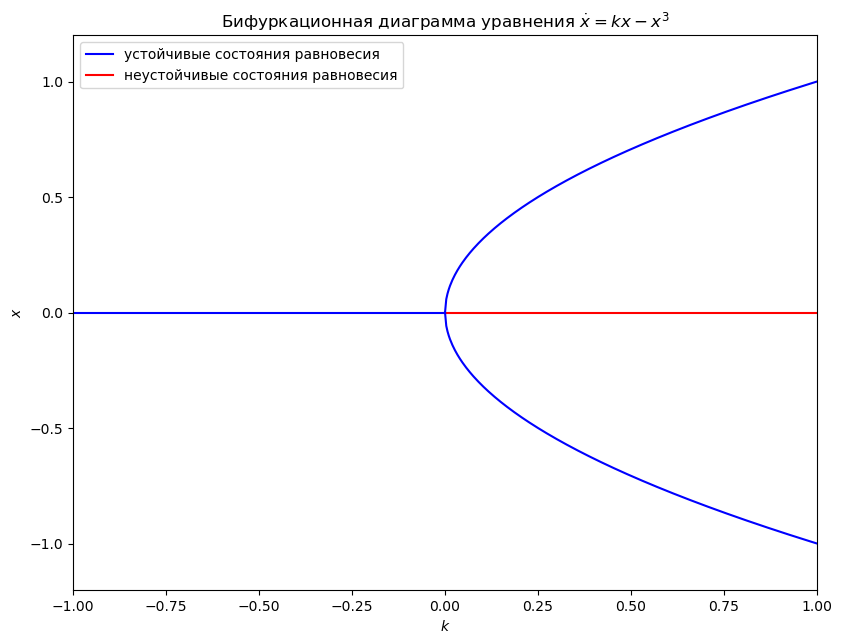

In [13]:
kmin = -1
kmax = 1
xmin = -1.2
xmax = 1.2
blue, = plot([kmin, 0], [0, 0], 'b', label='устойчивые состояния равновесия')
red, = plot([0, kmax], [0, 0], 'r', label='неустойчивые состояния равновесия')
ks = linspace(0, kmax, 301)
plot(ks, sqrt(ks), 'b')
plot(ks, -sqrt(ks), 'b')
axis([kmin, kmax, xmin, xmax])

xlabel(r'$k$')
ylabel(r'$x$')
legend(loc='upper left')
title(r'Бифуркационная диаграмма уравнения $\dot x = k x - x^3$');

## Решение

### 7.1. Бифуркационная диаграмма для маятника `p1`

In [16]:
# Вставьте и запустите код для построения бифуркационной диаграммы

### 7.2. Бифуркационная диаграмма для маятника `p2`

In [18]:
# Вставьте и запустите код для построения бифуркационной диаграммы

### 7.3. Аналитическое условие на $k_0$ и пояснение к заданию 5.4

*Запишите аналитическое условие на $k_0$, и пояснения, что происходит при критическом угле, близком или превышающем 90°, и почему для маятника `p2` оказался возможен подъём из состояния $\varphi = 3\pi$, $\dot\varphi = 0$.*

<a name="sec:pr15"></a>
# Задание 8. Линеаризация обратной связью

В предыдущих заданиях 4 — 7 мы увидели, что маятники `p1` и `p2`, управляемые с помошью внешнего момента и горизонтальной силы соответственно, демонстрируют существенно различное поведение при линейной стратегии управления. Мы увидели, что в двух случаях стабилизации происходит в результате бифуркации «вилка» сверх- и докритического типов. Это был взгляд с точки зрения теории динамических систем. Теперь рассмотрим различия между маятниками со стороны понятийного аппарата собственнно теории управления. Будем делать это постепенно, рассмотрев различные методы синтеза нелинейных стратегий управления. Начнём с метода, который называется **линеаризация обратной связью (_англ_ feedback linearization)**.

Обычно линеаризацией называют процедуру, основанную на разложении нелинейных функций по формуле Тейлора и отбрасывании нелинейных членов. В результате этой процедуры исходным нелинейным системам и уравнениям ставятся в соответствие линейные системы и уравнения. Иными словами, в практических и исследовательских целях исходная нелинейная система заменяется приближённой линейной системой, которая себя ведёт схоже с исходной в окрестности некоторого точного решения исходной нелинейной задачи. В теории управления это позволяет, к примеру, исследовать устойчивость состояний равновесия и синтезировать управления, стабилизирующие исходно неустойчивые состояния равновесия, как мы это делали в предыдущих заданиях. Однако всегда следует помнить, что устойчивость системы управления (и её необходимое качество, например, степень устойчивости), синтезированной на основе линеаризованной системы, может реализовываться лишь в малой окрестности того решения, относительного которого проводилась линеаризация. При этом размеры этой окрестности в общем случае неизвестны. Также методы синтеза систем управления на основе линейной теории позволяют синтезировать лишь линейную часть стратегии управления, в то время как правильно выбранная нелинейная часть может обеспечить лучшее качество управления. Избавится от этих проблем как раз может помочь метод линеаризации обратной связью.

Сначала займёмся только маятником `p1`, который описывается уравнением&nbsp;[$(4)$](description.ipynb#eq:phi)
$$
\ddot \varphi + \nu\dot\varphi - \Omega^2 \sin\varphi = -u
$$
Легко заметить, что единственным нелинейным слагаемым в нём является $\Omega^2 \sin\varphi$. Перенеся это слагаемое в правую часть и сделав замену $u = v + \Omega^2 \sin\varphi$ (такая замена называется преобразование обратной связью), получим новое эквивалентное линейное уравнение
$$
\ddot \varphi + \nu\dot\varphi = -v,
$$
где в качестве управления теперь выступает $v$. Теперь выбирая линейные стратегии управления $v = k_0 \varphi + k_1 \dot\varphi$ будем получать линейные замкнутые системы с предсказуемым поведением и качеством управления во всём пространстве состояний (во всей фазовой плоскости). *Синтезируйте такое стабилизирующее управление для маятника `p1` и приведите два примера (в виде графиков временных зависимостей угла отклонения и управления) для маятника, начинающего своё движение из нижнего положения с нулевой скоростью, когда процесс установления является ангармоническим и квазигармоническим. В качестве целевых линейных систем возьмите $\ddot\varphi + \dot\varphi + 0.2\varphi = 0$ и $\ddot\varphi + 0.2\dot\varphi + \varphi = 0$. Постройте соответствующие фазовые портреты замкнутых систем.*

Нелинейную стратегию управления по состоянию можно задать с помощью класса `StateFeedbackControl`, где в качестве третьего аргумента конструктора выступает стратегия управления (функция, принимающая вектор состояния и возвращающая вектор управления).

## Пример расчёта для нелинейного управления $u = \Omega^2 \sign \varphi$

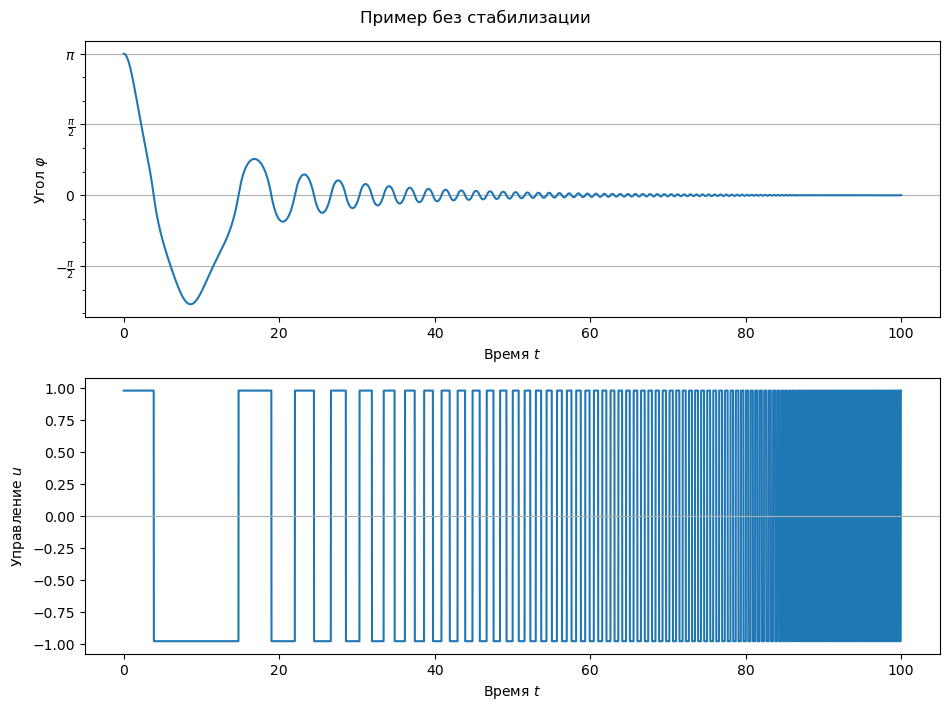

In [24]:
# Управление с k_0 = 0.5, k_1 = 0.7
c = StateFeedbackControl(2, 1, lambda x: [p1.omega**2*sign(x[0])])
# Численное интегрирование методом Рунге — Кутты с выводом управления u
t, s, u = integrate(p1, c, x0=[pi, 0], v0=empty(0), dt=0.01, T=100, N=1,
                    return_control=True)

subplot(2, 1, 1)
plot(t, s[:, 0])
axis_pi_ticks(gca().yaxis, pi/2, pi/6)
grid(axis='y')
xlabel(r'Время $t$')
ylabel(r'Угол $\varphi$')
subplot(2, 1, 2)
plot(t, u[:, 0])
axhline(0, lw=rcParams['grid.linewidth'], ls=rcParams['grid.linestyle'],
        c=rcParams['grid.color'])
xlabel(r'Время $t$')
ylabel(r'Управление $u$')
suptitle(r'Пример без стабилизации')
tight_layout();

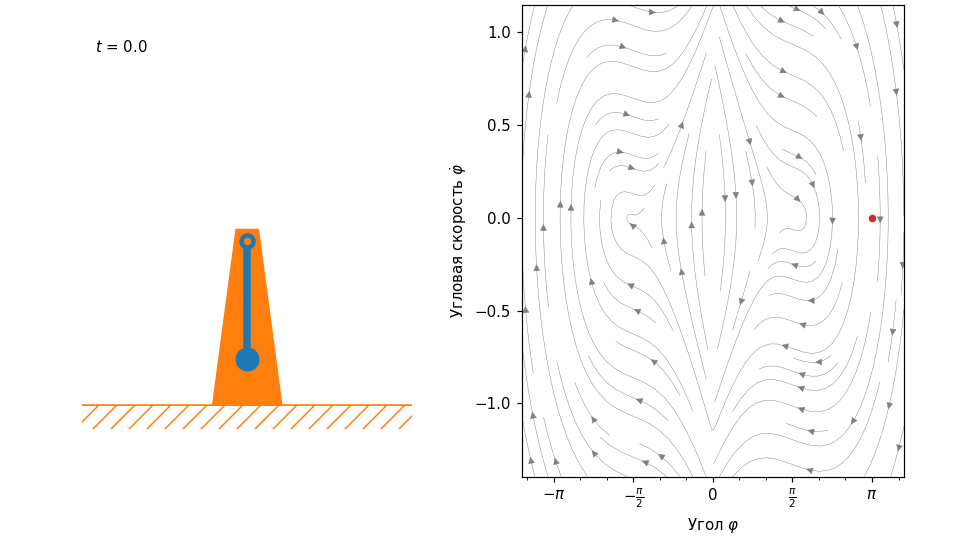

In [25]:
# Построение анимированного изображения gif
anim = animate_pendulum(t, s, phi_lims=(-1.2*pi, 1.2*pi),
                        phase_portrait=[p1, c], cylinder_mode=False, spacing=30,
                        invsec=1, filename='temp/test8.gif')
Image('temp/test8.gif')

# Раскомментируйте для построения видео mp4 (ffmpeg должен быть установлен)
#anim = animate_pendulum(t, s, phi_lims=(-1.2*pi, 1.2*pi),
#                        phase_portrait=[p1, c], cylinder_mode=False, spacing=30,
#                        invsec=1, filename='temp/test8.mp4')
#Video('temp/test8.mp4')

# Раскомментируйте для создания анимации на JavaScript
#anim = animate_pendulum(t, s, phi_lims=(-1.2*pi, 1.2*pi),
#                        phase_portrait=[p1, c], cylinder_mode=False, spacing=30,
#                        invsec=1)
#HTML(anim.to_jshtml())

## Решение

### 8.1. Целевая система $\ddot\varphi + \dot\varphi + 0.2\varphi = 0$

*Запишите аналитическое выражение для синтезированного управления.*

In [29]:
# Вставьте и запустите код для построения графиков временной реализации

In [30]:
# Вставьте и запустите код для построения анимации (необязательно)

In [31]:
# Вставьте и запустите код для построения фазового портрета

### 8.2. Целевая система $\ddot\varphi + 0.2\dot\varphi + \varphi = 0$

*Запишите аналитическое выражение для синтезированного управления.*

In [34]:
# Вставьте и запустите код для построения графиков временной реализации

In [35]:
# Вставьте и запустите код для построения анимации (необязательно)

In [36]:
# Вставьте и запустите код для построения фазового портрета